In [1]:
# %% Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline
import pickle

In [2]:
# %% Download necessary NLTK datasets
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# %% Load Dataset
df = pd.read_csv("spam_ham_dataset.csv", encoding='ISO-8859-1')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [5]:
# %% Check data distribution
print(df['label'].value_counts())

label
ham     3672
spam    1499
Name: count, dtype: int64


C:\Users\priya\AppData\Local\Temp\ipykernel_21856\3958729143.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["label"].value_counts().index, y=df["label"].value_counts().values, palette="viridis")


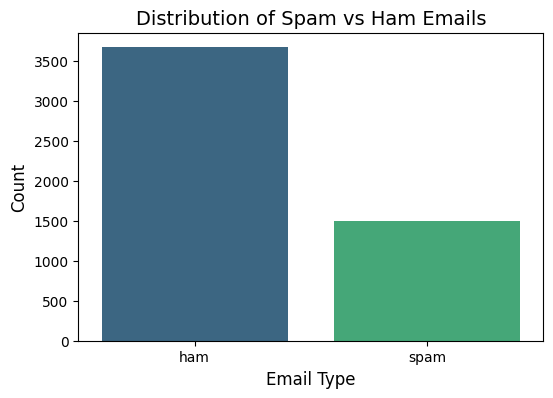

In [6]:
# %% Visualize spam vs ham distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=df["label"].value_counts().index, y=df["label"].value_counts().values, palette="viridis")
plt.title("Distribution of Spam vs Ham Emails", fontsize=14)
plt.xlabel("Email Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [8]:
df['label'].value_counts(normalize=True) * 100

label
ham     71.01141
spam    28.98859
Name: proportion, dtype: float64

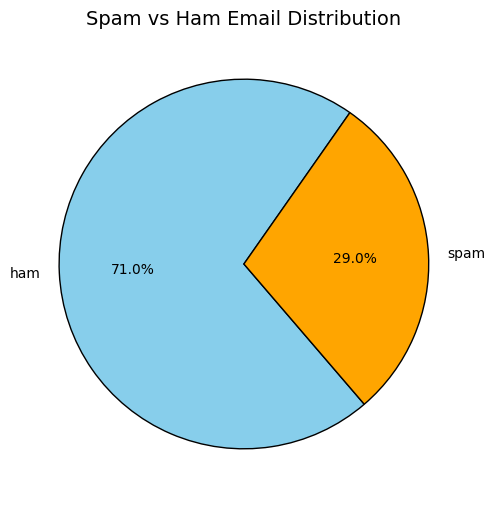

In [9]:
# %% Pie chart for percentage distribution
plt.figure(figsize=(6, 6))
plt.pie(df["label"].value_counts(normalize=True) * 100, 
        labels=df["label"].value_counts().index, autopct='%1.1f%%', 
        colors=["skyblue", "orange"], startangle=55, wedgeprops={'edgecolor': 'black'})
plt.title("Spam vs Ham Email Distribution", fontsize=14)
plt.show()

In [10]:
df.drop('Unnamed: 0', axis=1,inplace=True)
df.drop('label', axis=1, inplace=True)

In [11]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [12]:
# %% Initialize text preprocessing tools
stemmer = PorterStemmer()
stopwords_set = set(stopwords.words('english'))

In [13]:
# Define text preprocessing function
def preprocess(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()  # Tokenize
    words = [stemmer.stem(word) for word in words if word not in stopwords_set]  # Remove stopwords & stem
    return ' '.join(words)

In [14]:
# %% Apply preprocessing to the dataset
df["clean_text"] = df["text"].apply(preprocess)

In [15]:
# %% Define features and labels
X = df['clean_text']
y = df['label_num']

# %% Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# %% Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [17]:
# %% Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [18]:
# %% Evaluate the model
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 92.08%


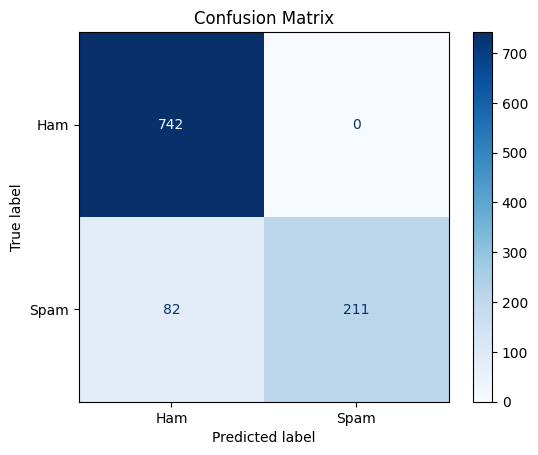

In [19]:
# %% Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [20]:
# %% Classification report
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.90      1.00      0.95       742
        Spam       1.00      0.72      0.84       293

    accuracy                           0.92      1035
   macro avg       0.95      0.86      0.89      1035
weighted avg       0.93      0.92      0.92      1035



In [21]:
# %% Function to predict spam messages
def predict_spam(text):
    text = preprocess(text)
    text_vectorized = vectorizer.transform([text])
    prediction = model.predict(text_vectorized)[0]
    return "Spam" if prediction == 1 else "Ham"

In [22]:
# %% Sample test cases
test_texts = [
    "Congratulations! You've been selected as a winner. TEXT WON to 44255 to claim your prize.",
    "Reminder: You have an appointment with the doctor tomorrow at 3 PM.",
    "Your Amazon order has been dispatched. Your order ID is #251-1981528-982.",
    "Alert: Your account has been compromised. Please reset your password immediately.",
    "Congratulations! You've won a free trip to Hawaii. Text 'WON' to 555-1234 to claim your reward.",
    "You have a new message from your bank. Please check your account for details.",
    "Your package has been delivered. Click here to track your order.",
    "You've received a new notification from your social media account. Check it out!",
]

In [23]:
# %% Predict on test messages
for text in test_texts:
    result = predict_spam(text)
    print(f"Message: {text}")
    print(f"Prediction: {result}")

Message: Congratulations! You've been selected as a winner. TEXT WON to 44255 to claim your prize.
Prediction: Spam
Message: Reminder: You have an appointment with the doctor tomorrow at 3 PM.
Prediction: Ham
Message: Your Amazon order has been dispatched. Your order ID is #251-1981528-982.
Prediction: Ham
Message: Alert: Your account has been compromised. Please reset your password immediately.
Prediction: Ham
Message: Congratulations! You've won a free trip to Hawaii. Text 'WON' to 555-1234 to claim your reward.
Prediction: Ham
Message: You have a new message from your bank. Please check your account for details.
Prediction: Ham
Message: Your package has been delivered. Click here to track your order.
Prediction: Ham
Message: You've received a new notification from your social media account. Check it out!
Prediction: Ham


In [24]:
# %% Create a pipeline for better integration
spam_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # TF-IDF Vectorizer
    ('classifier', MultinomialNB())     # Naive Bayes Classifier
])

In [25]:
# Train pipeline on full dataset
spam_pipeline.fit(X, y)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [26]:
# %% Save the trained pipeline
with open('spam_pipeline.pkl', 'wb') as file:
    pickle.dump(spam_pipeline, file)